# Problem 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from wordcloud import WordCloud
warnings.simplefilter('ignore')

### Part 3.1A

In [2]:
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')

#only relevant collumns
df = df.loc[:, ['iso_code', 'date', 'total_cases_per_million', 'total_vaccinations_per_hundred','icu_patients_per_million']]

#convert vax into per mill
df['total_vaccinations_per_million'] = df['total_vaccinations_per_hundred'] * 10000
df.drop('total_vaccinations_per_hundred', axis=1, inplace=True)

# date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# only the four chosen countries and rows for 350 days or more since 2020-12-09
countries = ['USA', 'CHL', 'KOR', 'FRA']
start_date = pd.to_datetime('2020-12-09')
df = df[df['iso_code'].isin(countries) & (df['date'] >= start_date + pd.Timedelta(days=350))]

# collumn for number of days since 2020-12-09 for x axis
start_date = pd.to_datetime('2020-12-09')
df['days_since'] = (df['date'] - start_date).dt.days

# Drop old date column for new "days_since" column
df.drop('date', axis=1, inplace=True)
df.insert(1, 'days_since', df.pop('days_since'))

In [3]:
#USA
df_USA = df[df['iso_code'].str.contains('USA')]
df_USA.dropna(how='any', inplace=True)
df_USA = df_USA.reset_index(drop=True)
#CHL
df_CHL = df[df['iso_code'].str.contains('CHL')]
df_CHL.dropna(how='any', inplace=True)
df_CHL = df_CHL.reset_index(drop=True)

#KOR
df_KOR = df[df['iso_code'].str.contains('KOR')]
df_KOR.dropna(how='any', inplace=True)
df_KOR= df_KOR.reset_index(drop=True)

#FRA
df_FRA = df[df['iso_code'].str.contains('FRA')]
df_FRA.dropna(how='any', inplace=True)
df_FRA = df_FRA.reset_index(drop=True)

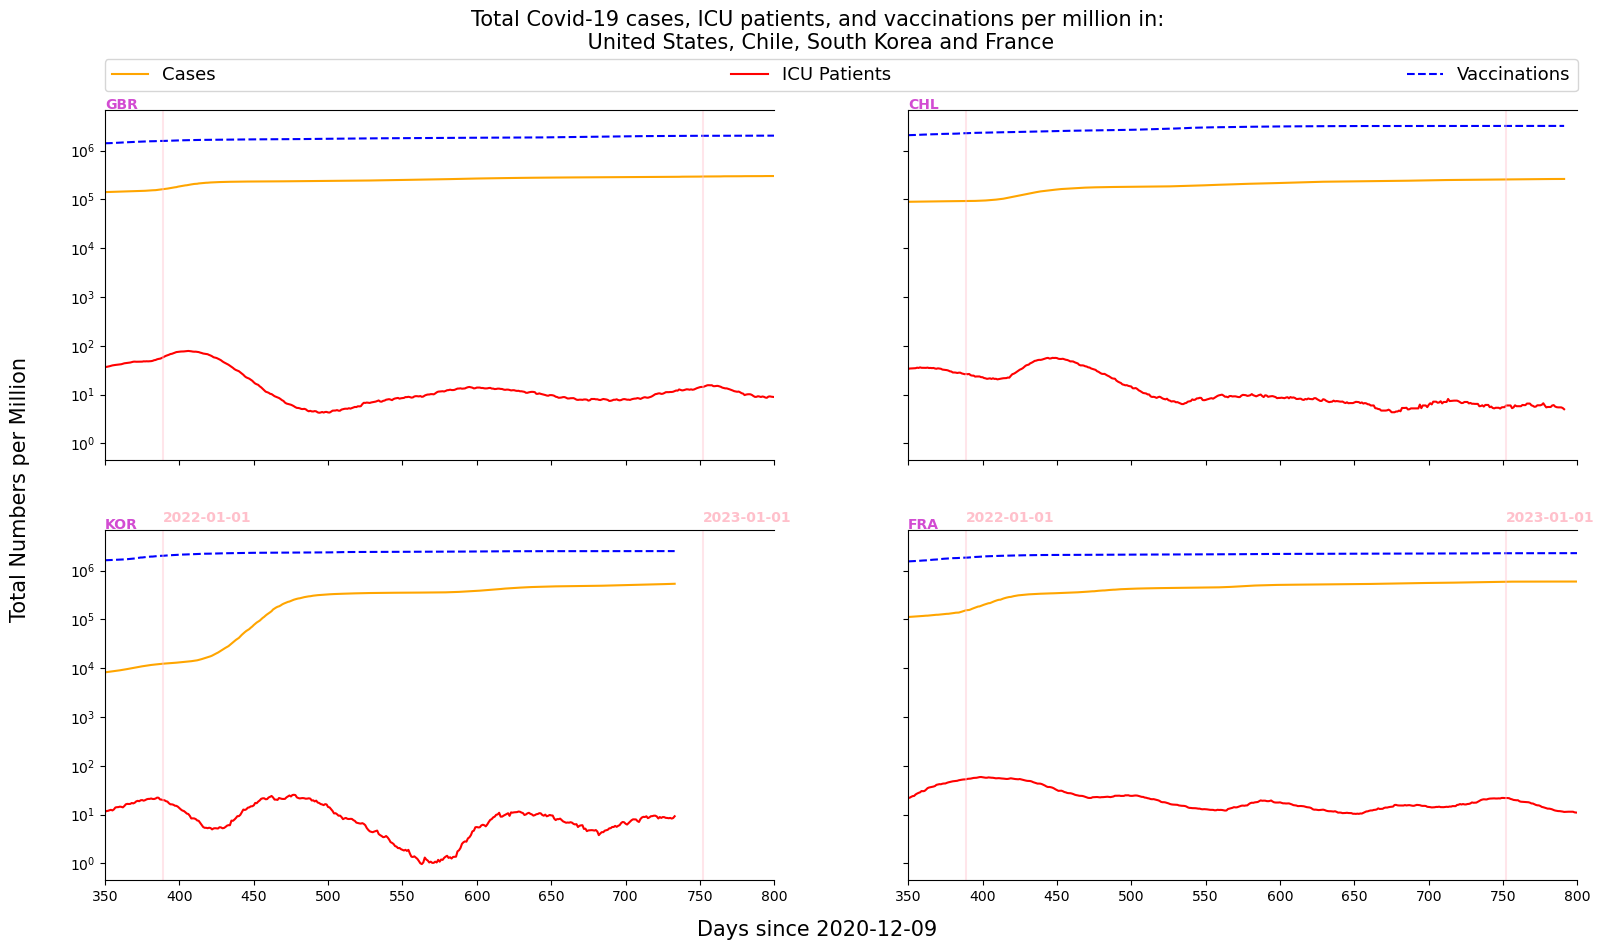

In [4]:
#figure
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(19,10),sharex = True,sharey=True)

#axes objects
axes = axes.ravel().tolist()

plt.suptitle('Total Covid-19 cases, ICU patients, and vaccinations per million in:\n United States, Chile, South Korea and France',size=15,weight = 'ultralight')
fig.supxlabel('Days since 2020-12-09',size = 15, y = 0.05)
fig.supylabel('Total Numbers per Million',size = 15, x = 0.075)

#DATA
x = 'days_since'
y1 ='total_cases_per_million'
y2 = 'icu_patients_per_million'
y3 = 'total_vaccinations_per_million'

data = [df_USA,df_CHL,df_KOR,df_FRA]

#subplot - axes
for z,i in enumerate (data) :
    i.plot(x=x,y =[y1,y2] ,ax=axes[z],legend =False,logy=True,color = ['orange','red'])
    i.plot(x=x,y =y3 ,ax=axes[z],legend =False,logy=True,color = 'blue',linestyle = '--')
    axes[z].set_xlim(left=350,right =800)
    axes[z].set(xlabel=None)
    axes[z].axvline(x=389,ymin = 0, ymax = 1,color ='pink',alpha = 0.4 )
    axes[z].axvline(x=752,ymin = 0, ymax = 1,color ='pink',alpha = 0.4 )
    axes[z].spines["right"].set_visible(False)
    axes[z].tick_params(axis='y', which='minor', left=False)
    axes[z].grid(False)
#pink lines

axes[0].text(x=350,y=7000000,s = 'GBR', color = 'm',weight='demi',alpha = 0.7)
axes[1].text(x=350,y=7000000,s = 'CHL', color = 'm',weight='demi',alpha = 0.7)
axes[2].text(x=350,y=7000000,s = 'KOR', color = 'm',weight='demi',alpha = 0.7)
axes[3].text(x=350,y=7000000,s = 'FRA', color = 'm',weight='demi',alpha = 0.7)

axes[2].text(x=389,y=10000000,s = '2022-01-01', color = 'pink',weight='demi',alpha = 1)
axes[2].text(x=752,y=10000000,s = '2023-01-01', color = 'pink',weight='demi',alpha = 1)
axes[3].text(x=389,y=10000000,s = '2022-01-01', color = 'pink',weight='demi',alpha = 1)
axes[3].text(x=752,y=10000000,s = '2023-01-01', color = 'pink',weight='demi',alpha = 1)

#legend
axes[0].plot([], [], color='orange', label='Cases')
axes[0].plot([], [], color='red', label='ICU Patients')
axes[0].plot([], [], color='blue', linestyle='--', label='Vaccinations')
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels [3:], loc= 'upper center', ncol=3, mode = 'expand', bbox_to_anchor=(0.12,0.47,0.785, 0.47), fontsize = 13);



### Part 3.1B

In [5]:
df = pd.read_csv(
    '/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/owid-covid-data.csv')

In [6]:
def make_dfs(x):
    # Filter data for the given ISO code and calculate days since first vaccination
    y = df[df['iso_code'].str.contains(x)]
    y['date'] = y['date'].apply(pd.to_datetime)
    y['Days Since 1st Case'] = (y['date'] - (y.loc[df['total_cases'] >= 1, 'date'].iloc[0])).dt.days

    # Filter data to only include dates within a certain range and select relevant columns
    y = y[y['Days Since 1st Case'] <= 365]
    y = y[y['Days Since 1st Case'] >= -365]
    y = y[['iso_code', 'total_deaths', 'total_cases', 'stringency_index', 'Days Since 1st Case','date']]

    # Remove any rows with missing data in the stringency_index column and reset index
    y = y[y['stringency_index'].notna()]
    y = y.reset_index(drop=True)

    return y


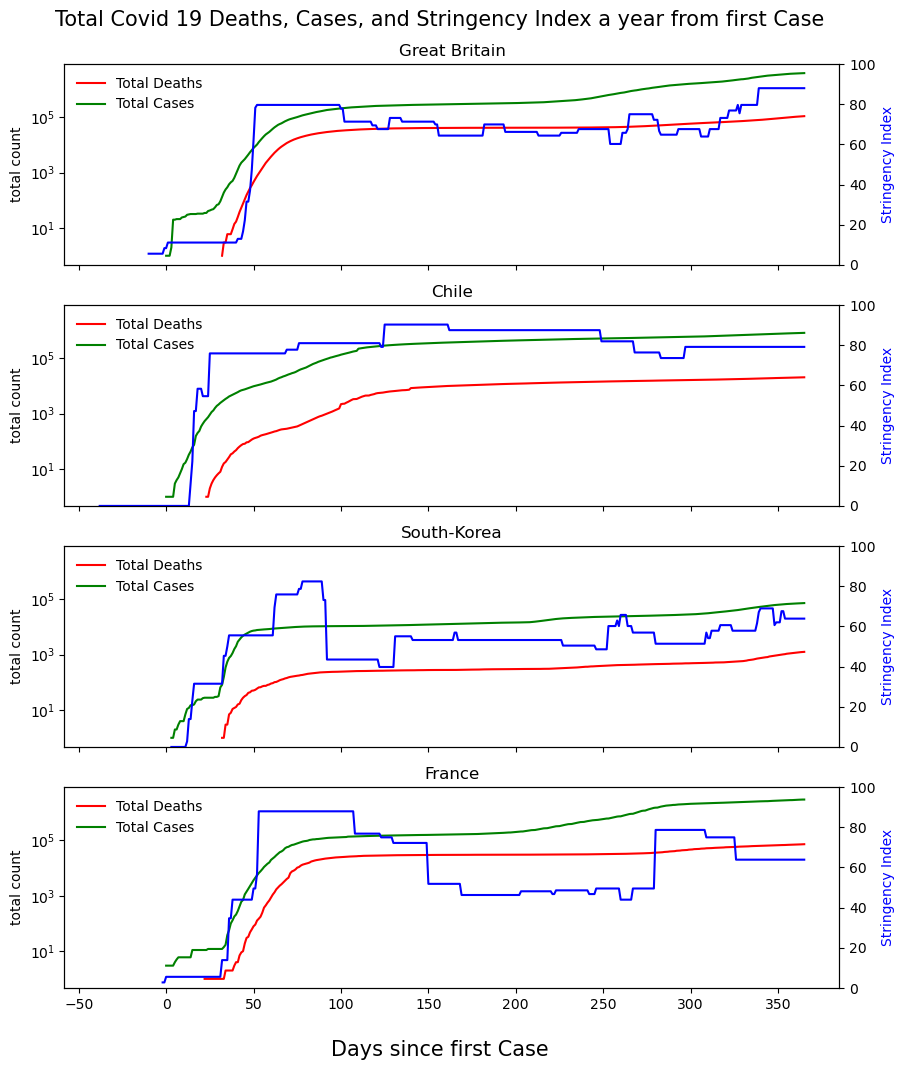

In [7]:
# Create a figure with 4 subplots, each representing a different country
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(10, 12), sharex=True, sharey=True)
plt.suptitle('Total Covid 19 Deaths, Cases, and Stringency Index a year from first Case', size=15,
             weight='ultralight', y=0.925)
fig.supxlabel('Days since first Case', size=15, y=0.05)

# List of the four subplots
axes = [ax, ax1, ax2, ax3]

# Add plot titles for each subplot
ax.set(title='Great Britain')
ax1.set(title='Chile')
ax2.set(title='South-Korea')
ax3.set(title='France')

isocodes = ['GBR','CHL','KOR','FRA']

# Remove gridlines from all subplots
ax.grid(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Loop through each ISO code and corresponding subplot
for i, z in zip(isocodes, axes):
    axa = z.twinx()

    # Create a DataFrame for the current ISO code and extract relevant columns
    x = make_dfs(i)['Days Since 1st Case']
    y1 = make_dfs(i)['total_deaths']
    y2 = make_dfs(i)['stringency_index']
    y3 = make_dfs(i)['total_cases']

    # Plot total deaths and total vaccinations on the left y-axis
    deaths_line, = z.plot(x, y1, color='r', label='Total Deaths')
    cases_line, = z.plot(x, y3, color='g', label='Total Cases')

    # Plot stringency index on the first right y-axis
    axa.plot(x, y2, color='b')

    # Add y-axis labels and set scales for each axis
    z.set_ylabel('total count', color='black')
    z.set(yscale='log')

    axa.set_ylabel('Stringency Index', color='b')
    axa.set_ylim(0, 100)

    # Customize the ticks
    axa.grid(False)

    # Create a custom legend without Stringency Index and with no border
    legend_lines = [deaths_line, cases_line]
    legend_labels = [line.get_label() for line in legend_lines]
    z.legend(legend_lines, legend_labels, loc='upper left', frameon=False)

plt.show()


The figure above allows us to visualise govornments responses at the start of the pandemic. One can observe that countries all tended to raise the stringency index to a small degree between the recording of the first cases and the first death. Then once faced with a positive total death count, governments (apart from the United Kingdom) more drastically increased the "stringency" of their response as they came to the stark realisation of the gravity of the oncoming pandemic.

The figure also is usefull in depicting the relationship between total cases, total deaths and stringency index. In the case of france between days 150 and 275 the strinengcy index was lowered as the govornment relaxed their response. Then after they saw a rise in cases from this they once againe raised their response in order to limit this raise in deaths.


### Part 3.2A

In [8]:
df_LLM = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/Submission/inaug_speeches_LLM.csv')

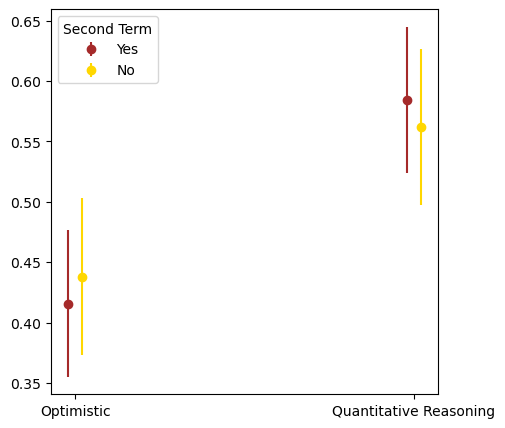

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_LLM = df_LLM[(df_LLM['Inaugural Address'] == 'First Inaugural Address') | (df_LLM['Inaugural Address'] == 'Inaugural Address')]

# Prepare data for plotting
df_LLM['Second Term'] = df_LLM['Inaugural Address'].apply(lambda x: 'Yes' if x == 'First Inaugural Address' else 'No')
df_LLM = df_LLM.melt(id_vars=['Second Term'], value_vars=['Optimistic', 'QuantLLMQuant'], var_name='Category', value_name='Value')

# Calculate mean and standard deviation
mean_values = df_LLM.groupby(['Category', 'Second Term']).mean()
std_values = df_LLM.groupby(['Category', 'Second Term']).std()

# Create the point plot
fig, ax = plt.subplots(figsize=(5, 5))

x_labels = ['Optimistic', 'QuantLLMQuant']
x_tick_positions = [0.25, 1.25]

for i, (label, xpos) in enumerate(zip(x_labels, x_tick_positions)):
    y_yes = mean_values.loc[(label, 'Yes'), 'Value']
    y_no = mean_values.loc[(label, 'No'), 'Value']
    std_yes = std_values.loc[(label, 'Yes'), 'Value']
    std_no = std_values.loc[(label, 'No'), 'Value']

    ax.errorbar(xpos - 0.02, y_yes, yerr=std_yes, fmt='o', color='brown', label='Yes' if i == 0 else '')
    ax.errorbar(xpos +0.02, y_no, yerr=std_no, fmt='o', color='gold', label='No' if i == 0 else '')

ax.set_xticks(x_tick_positions)
ax.set_xticklabels(['Optimistic','Quantitative Reasoning'])
ax.legend(title='Second Term', loc='upper left')
ax.grid(False)
plt.show()

### Part 3.2B

In [10]:
df_LLM = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/Submission/inaug_speeches_LLM.csv')


In [11]:
#Finding words unique to reelection & no reelection speeches
import string
# convert lists of words into sets (reeleciton)
reelection_speeches = df_LLM[df_LLM['Inaugural Address'] != 'Inaugural Address']['text']
reelection_words = set()
for speech in reelection_speeches:
    words = speech.split()
    # alphabetical characters only
    words = [word.translate(str.maketrans('', '', string.punctuation)).lower() for word in words if word.isalpha()]
    reelection_words.update(words)

# list into set for no relection
not_reelection_speeches = df_LLM[df_LLM['Inaugural Address'] == 'Inaugural Address']['text']
not_reelection_words = set()
for speech in not_reelection_speeches:
    words = speech.split()
    # alphabetical
    words = [word.translate(str.maketrans('', '', string.punctuation)).lower() for word in words if word.isalpha()]
    not_reelection_words.update(words)

#create unique word sets
unique_to_not_reelection = not_reelection_words.difference(reelection_words)
unique_to_reelection = reelection_words.difference(not_reelection_words)


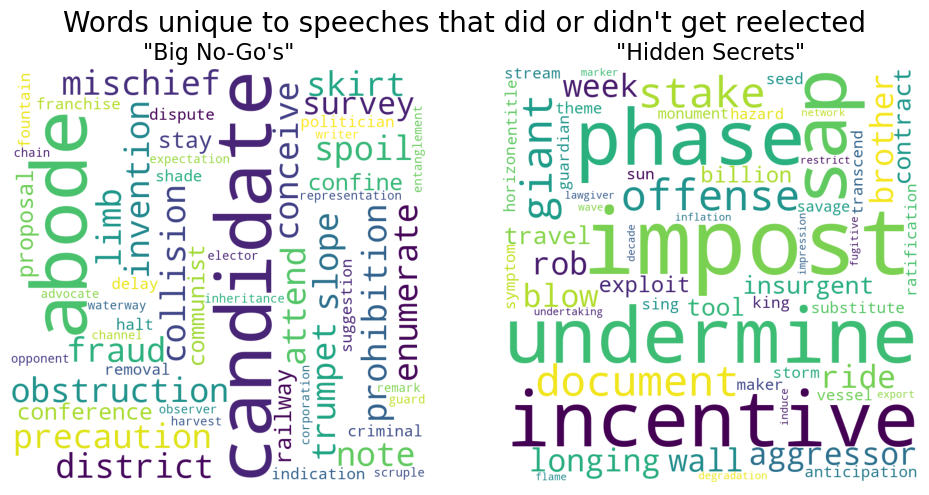

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 20)

# no re-election wordcloud
wordcloud.generate_from_text(' '.join(unique_to_not_reelection))
ax1.imshow(wordcloud)
ax1.axis("off")
ax1.set_title('"Big No-Go\'s"', fontsize=16)

# re-election wordcloud
wordcloud.generate_from_text(' '.join(unique_to_reelection))
ax2.imshow(wordcloud)
ax2.axis("off")
ax2.set_title('"Hidden Secrets"', fontsize=16)

# title
fig.suptitle('Words unique to speeches that did or didn\'t get reelected', fontsize=20)

plt.tight_layout()
plt.show()


The above plot shows words that are unique to speaches that went on to not get re-election and those that didnt. I think that wordclouds in this case are a brilliant way to convey the information. It highlights particular words that an incoming US president should think twice about using in their speech and those that should be included. However this is still somewhat trivial since these are singular words so in many cases there is not context or sentiment that can be interpreted.

### Part 3.3A


In [13]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/person_2020_update.csv')


In [14]:
#Filtering
#year
df = df[df['birthyear'] > 1990]

#lat and long have values
df = df[(df['bplace_lat'].notnull()) & (df['bplace_lon'].notnull())]

#from uk & ireland
df = df[df['bplace_country'].isin(['United Kingdom', 'Ireland'])]


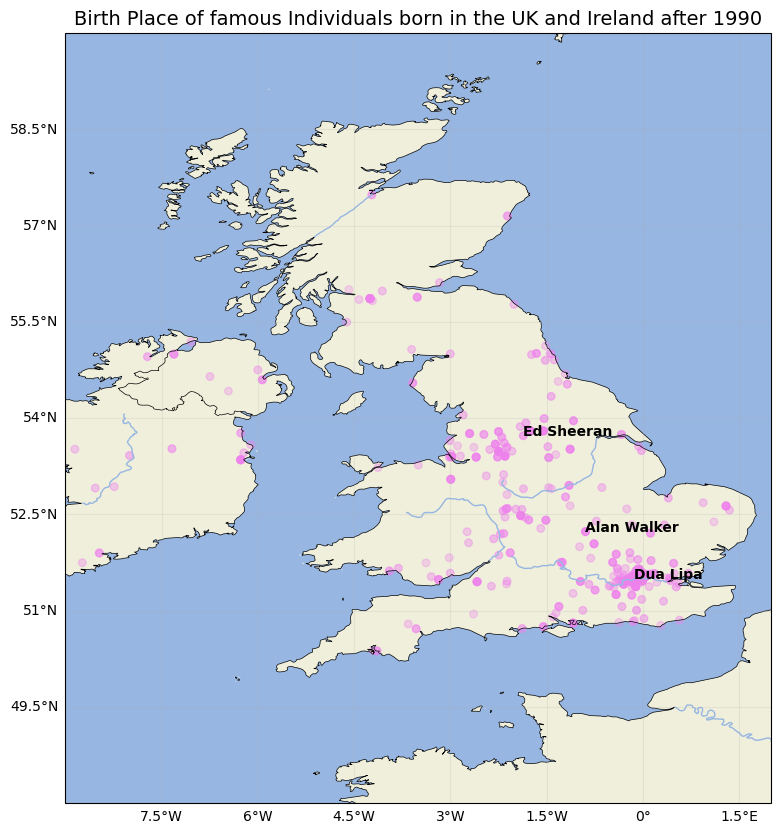

In [15]:
figure = plt.figure(figsize=(15,10))

#Draw map and UK and choose features
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.add_feature(cfeature.BORDERS,linewidth=0.5)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.set_extent( [-9, 2, 48, 60],crs=crs.PlateCarree())
ax.set_title('Birth Place of famous Individuals born in the UK and Ireland after 1990',size = 14)
#Draw feint gridlines and ticks on axis
coordinates = ax.gridlines(draw_labels=True,alpha=0.2)
coordinates.xlabels_top = False
coordinates.ylabels_right = False

#Plot points on graph
plt.scatter(
    x=df["bplace_lon"],
    y=df["bplace_lat"],
    color="violet",
    s=30,
    alpha=df['hpi']/100,
    transform=crs.PlateCarree()
)

#put top 3 rows name on map
for index,row in df.head(3).iterrows():
    plt.text(
        x=row["bplace_lon"],
        y=row["bplace_lat"],
        s=row["name"],
        weight='bold',
        transform=crs.PlateCarree(),)

#title
plt.show()

### Part 3.3B

In [16]:
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/person_2020_update.csv')
df

,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
0,18934,Q9458,18934,Muhammad,Muhammad,RELIGIOUS FIGURE,0.000000,M,NaN,False,...,0632-06-08,632.0,Mecca,NaN,False,27.918400,1450.0,5160422.0,3.199355,100.000000
1,17414699,Q720,17414699,Genghis_Khan,Genghis Khan,MILITARY PERSONNEL,0.000000,M,NaN,False,...,1227-08-18,1227.0,NaN,NaN,False,25.843621,858.0,3249211.0,2.753641,97.723669
2,18079,Q762,18079,Leonardo_da_Vinci,Leonardo da Vinci,INVENTOR,0.000000,M,NaN,False,...,1519-05-02,1519.0,NaN,NaN,False,17.545406,568.0,5362406.0,4.796629,97.460691
3,14627,Q935,14627,Isaac_Newton,Isaac Newton,PHYSICIST,0.000000,M,NaN,False,...,1727-03-31,1726.0,NaN,NaN,False,21.608920,378.0,3431331.0,4.632474,96.836567
4,17914,Q255,17914,Ludwig_van_Beethoven,Ludwig van Beethoven,COMPOSER,0.000000,M,NaN,False,...,1827-03-26,1827.0,NaN,Austria,False,19.796430,250.0,5179518.0,3.926626,96.583969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88932,64119467,Q95877306,64119467,Siarhei_Tsikhanouski,Siarhei Tsikhanouski,YOUTUBER,7.398064,M,strana888,True,...,NaN,NaN,NaN,NaN,False,NaN,42.0,NaN,NaN,20.115280
88933,61153000,Q64840184,61153000,Irfaan_Ali,Irfaan Ali,POLITICIAN,462.155254,M,NaN,True,...,NaN,NaN,NaN,NaN,False,NaN,40.0,NaN,NaN,19.125166
88934,63320558,Q87075301,63320558,Guadalupe_Campanur_Tapia,Guadalupe Campanur Tapia,SOCIAL ACTIVIST,3.093662,F,NaN,False,...,2018-01-16,2018.0,NaN,NaN,False,NaN,34.0,NaN,NaN,16.355506
88935,62810909,Q83648587,62810909,Charli_D'Amelio,Charli D'Amelio,YOUTUBER,5.708478,F,NaN,True,...,NaN,NaN,NaN,NaN,False,NaN,16.0,NaN,NaN,11.761399


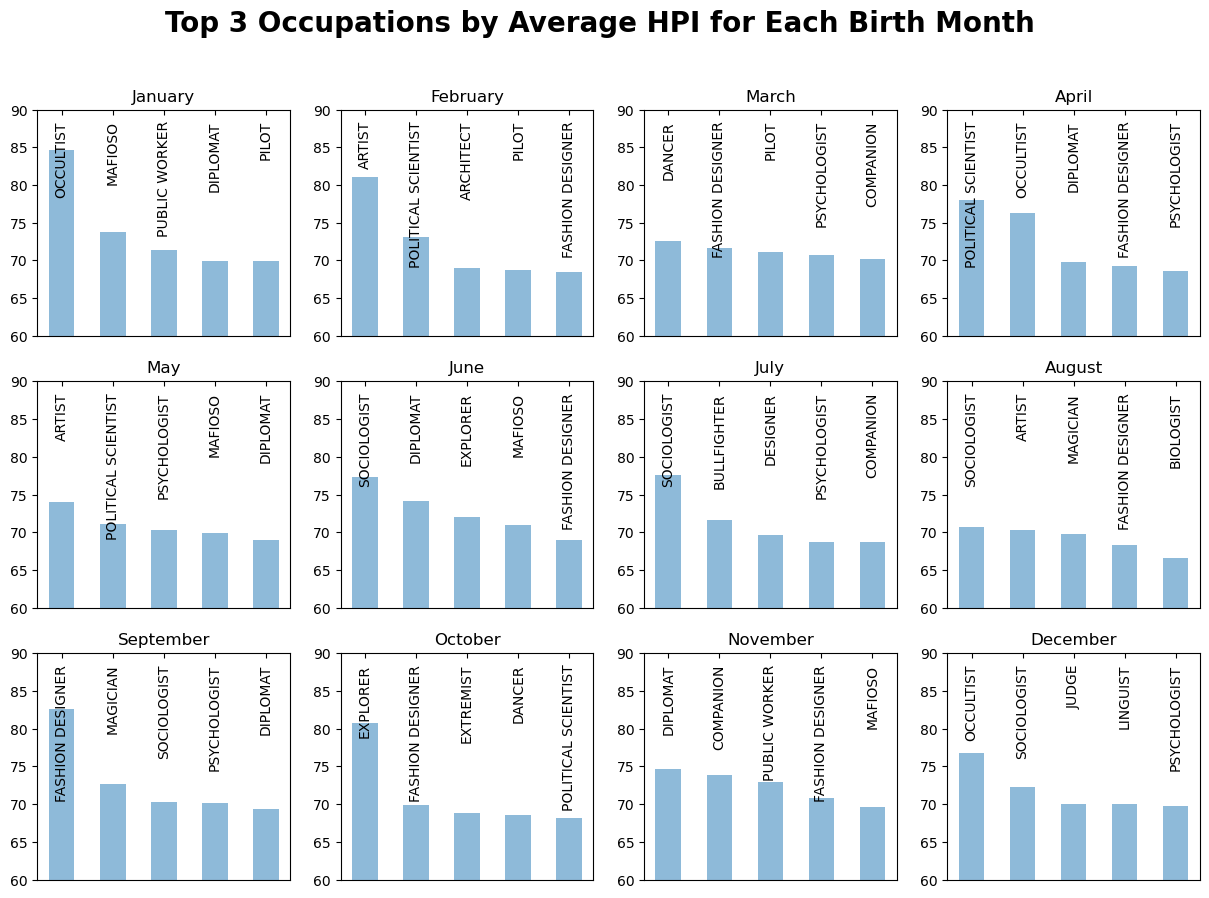

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar
# load data
df = pd.read_csv('/Users/elliottoates/Library/CloudStorage/OneDrive-UniversityofExeter/Second Year/Data Science/Project/data/person_2020_update.csv')

# filter data
df = df[df['birthdate'].notnull()]
df = df[df['birthyear'] > 1900]

# calculate average HPI by occupation and birth month
df['birthmonth'] = pd.to_datetime(df['birthdate'], format='%Y-%m-%d').dt.month
df['hpi'] = df['hpi'].fillna(0)
avg_hpi = df.groupby(['birthmonth', 'occupation'])['hpi'].mean().reset_index(name='avg_hpi')

# create subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# iterate over each month
for i, ax in enumerate(axs.flatten(), start=1):
    # get top 3 occupations for this month
    top_occupations = avg_hpi[avg_hpi['birthmonth'] == i].sort_values(by='avg_hpi', ascending=False).head(5)
    # plot bar chart of top 3 occupations
    ax.bar(top_occupations['occupation'], top_occupations['avg_hpi'],width =0.5,alpha = 0.5)
    ax.set_xticklabels(top_occupations['occupation'],rotation=90)
    ax.tick_params(axis='x', direction='in',pad = -155, top = True, bottom = False)
    ax.set_title(calendar.month_name[i])
    ax.set_ylim([60, 90])
    ax.grid(False)

# set overall title
fig.suptitle('Top 3 Occupations by Average HPI for Each Birth Month',size = 20, weight = 'bold')
#plt.tight_layout()
plt.show()

The plot displays the top five occupations by average HPI for each birth month, with each subplot representing a different month. This visualization is interesting because it provides insights into the distribution of occupations memorability by birth month. For example, we can see that certain occupations, such as oculists and diplomats, consistently appear in the top five for multiple months. Although this figure could perhaps be more usefull if the metric was by frequency in the respective birth month rather than mean hpi, the fact that this data set is centred around famous people and is based largley on wikepedia pages has resulted in there being certain occupations that have a massive amount of persons and so all months show the exact same occupations (there are 17000 footballers in the filtered dataset, compared to 1 bullfighter).